# Project: Images processing using OpenCV.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Images/ER.jpg')

# access pixel value. each pixel is img[y-row number, x-column number]
px = img[100,100] # this is the pixel at position (x=100 from the top, y=100 from the left)
print(px) # array of blue, green, red values

[ 45  80 183]


## Playing around with OpenCV, convert an image to grayscale

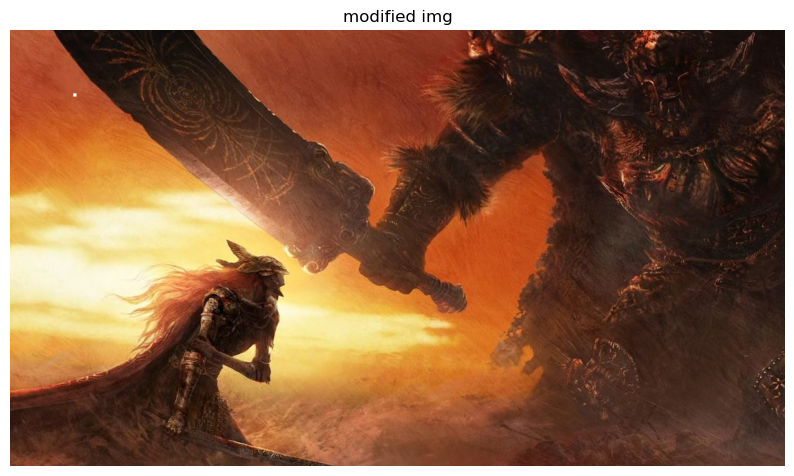

In [3]:
# modify pixel values
img[100, 100] = [255,255,255]
# draw a small square make it more visible
for y in range(98,103):
    for x in range(98,103):
        img[y,x] = [255,255,255]
        
# need to convert BGR to RGB for matplotlib display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# show img
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.title('modified img')
plt.axis('off')
plt.show()

In [4]:
# access img properties
img.shape # [rows, columns, channels-colours]
# good for checking if img is grayscaled

# total number of pixels
img.size

# img dtype
img.dtype

dtype('uint8')

In [5]:
# grayscaling an image
# formula is: Y = 0.299*R + 0.587*G + 0.114*B 
# Y is the grayscale intensity
print(img[200, 200]) # BGR == 51 140 228.Y value is 0.299*228 + 0.587*140 + 0.114*51 = 156


[ 51 140 228]


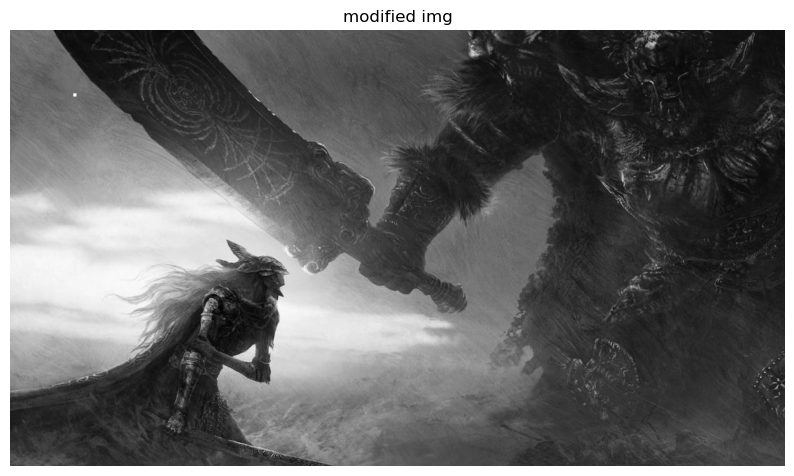

In [6]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# show img
plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap='gray')
plt.title('modified img')
plt.axis('off')
plt.show()

## Task: Resize, rotate, and crop images manually.


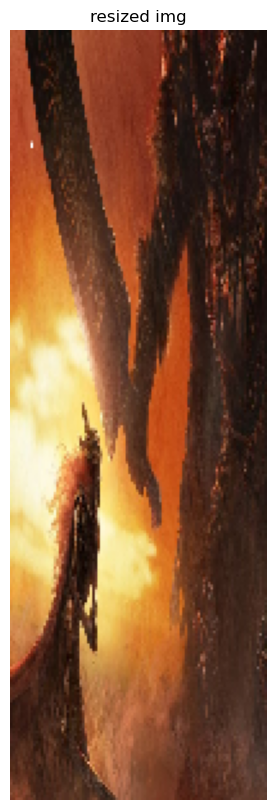

In [7]:
# resize an img
img_resized = cv.resize(img_rgb, (100, 300))

# show img
plt.figure(figsize=(10,10))
plt.imshow(img_resized)
plt.title('resized img')
plt.axis('off')
plt.show()


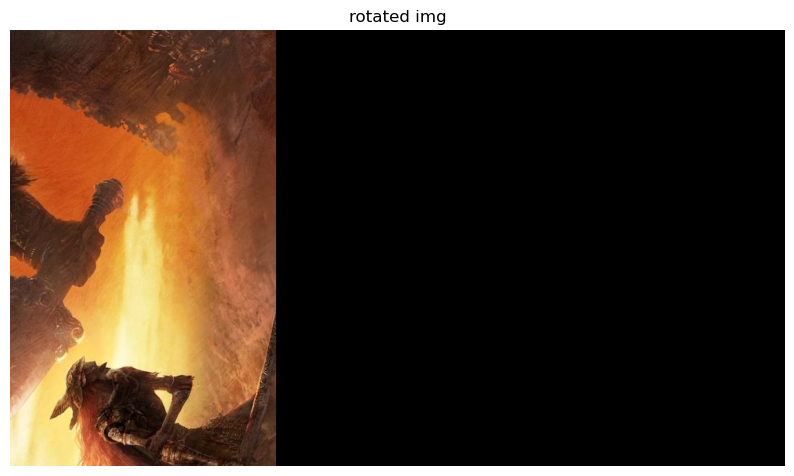

In [8]:
# rotate an image
rotated_image = cv.rotate(img_rgb, cv.ROTATE_90_CLOCKWISE) # quite limited

# rotate an image by a specified angle
(h,w) = img.shape[:2]
# calculate the centres
(cX, cY) = (h//2, w//2)

# rotate by 45 degrees
M = cv.getRotationMatrix2D((cX, cY), 90, 1)
rotated = cv.warpAffine(img_rgb, M, (w,h))

# show img
plt.figure(figsize=(10,10))
plt.imshow(rotated)
plt.title('rotated img')
plt.axis('off')
plt.show()


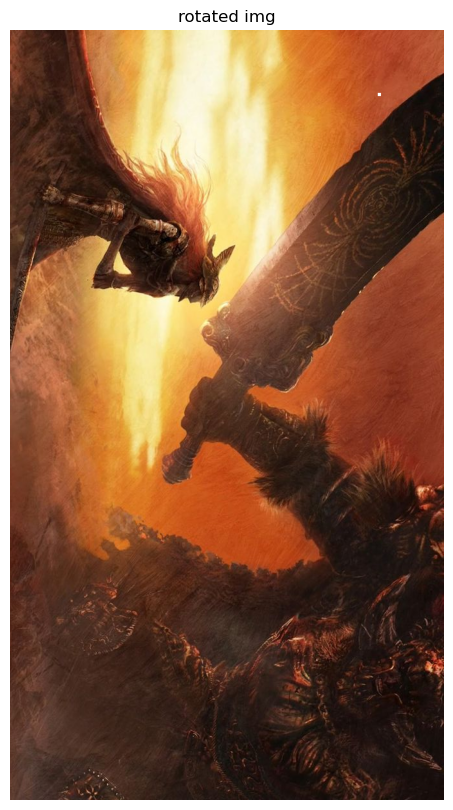

In [9]:
# show img
plt.figure(figsize=(10,10))
plt.imshow(rotated_image)
plt.title('rotated img')
plt.axis('off')
plt.show()


In [10]:
# see how the rotation using .warpaffine is not perfect? not updated the new dimension
(h,w) = img.shape[:2]

# set the rotation centre
centre = (w//2, h//2) # = (600, 337)
centre 

# get the rotation matrix. Use this to rotate the img
# 3 arguments (centre, angle, scale). angle: pos for rotate counterclockwise, neg for clockwise, scale: how big the img is
M = cv.getRotationMatrix2D(centre, 90, 1) 
M
# M's matrix meaning
# [cos, -sin, ...]
# [sin, cos, ...] i.e to get cos and sin values, we want M[0,0] and M[0,1] (in abs value)

array([[ 6.123234e-17,  1.000000e+00,  2.630000e+02],
       [-1.000000e+00,  6.123234e-17,  9.370000e+02]])

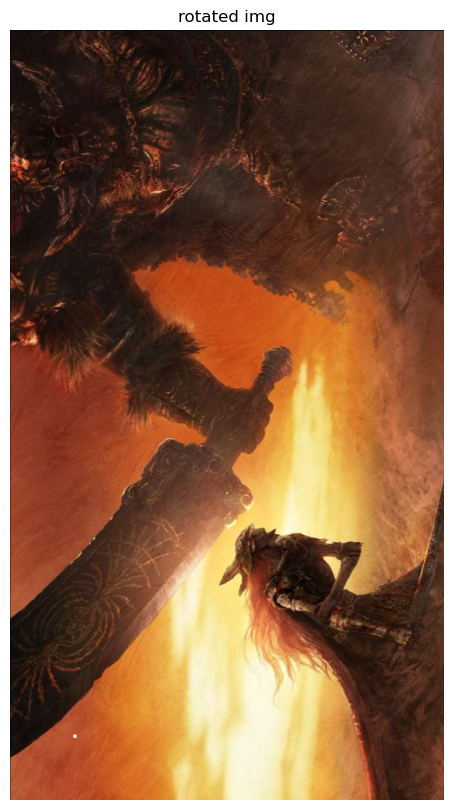

In [11]:
img_to_rotate = img_rgb.copy()
# new bounding dim
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

new_w = int((h * sin) + (w * cos)) # following the formula
new_h = int((h * cos) + (w * sin))

# adjust to the rotation matrix to the new centre
M[0, 2] += (new_w / 2) - centre[0]
M[1, 2] += (new_h / 2) - centre[1]

# new size rotation
rotated_3 = cv.warpAffine(img_to_rotate, M, (new_w, new_h))

# show img
plt.figure(figsize=(10,10))
plt.imshow(rotated_3)
plt.title('rotated img')
plt.axis('off')
plt.show()
